In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
from Classification import model_fit, plot_confusion_matrix, model_fit2, plot_prob, get_precision_recall

In [4]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)
heart.shape

(720, 14)

In [5]:
heartPCA = pd.read_csv('PCAData.csv')
heartPCA.drop(['Unnamed: 0'],axis=1, inplace=True)
heartPCA['num'] = heart.num
heartPCA.shape

(720, 14)

In [6]:
heartICA = pd.read_csv('ICAData.csv')
heartICA.drop(['Unnamed: 0'],axis=1, inplace=True)
heartICA['num'] = heart.num
heartICA.shape

(720, 14)

In [7]:
heartFactor = pd.read_csv('FactorData.csv')
heartFactor.drop(['Unnamed: 0'],axis=1, inplace=True)
heartFactor['num'] = heart.num
heartFactor.shape

(720, 14)

In [8]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()
XPCA = heartPCA.drop(['num'],axis=1).copy()
YPCA = heartPCA.num.copy()
XICA = heartICA.drop(['num'],axis=1).copy()
YICA = heartICA.num.copy()
XFactor = heartFactor.drop(['num'],axis=1).copy()
YFactor = heartFactor.num.copy()

In [9]:
SC = StandardScaler()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, 
                                                                  random_state=144, shuffle=True, stratify=Y) 
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(SC.fit_transform(X), Y, test_size=0.33, 
                                                                  random_state=144, shuffle=True, stratify=Y) 

In [11]:
glm = LogisticRegression()
glm.set_params(max_iter = 10000)
model_fit2(glm, X_train, X_test, Y_train, Y_test)

LogisticRegression

Train score is :0.647
Test score is :0.672


In [12]:
glm_scaled = LogisticRegression()
glm_scaled.set_params(max_iter = 10000)
model_fit2(glm_scaled, X_train_scaled, X_test_scaled, Y_train, Y_test)

LogisticRegression

Train score is :0.647
Test score is :0.668


In [13]:
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(XPCA, YPCA, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)
X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA = train_test_split(XICA, YICA, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)
X_train_F, X_test_F, Y_train_F, Y_test_F = train_test_split(XFactor, YFactor, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)

LogisticRegression

Train score is :0.649
Test score is :0.668
LogisticRegression


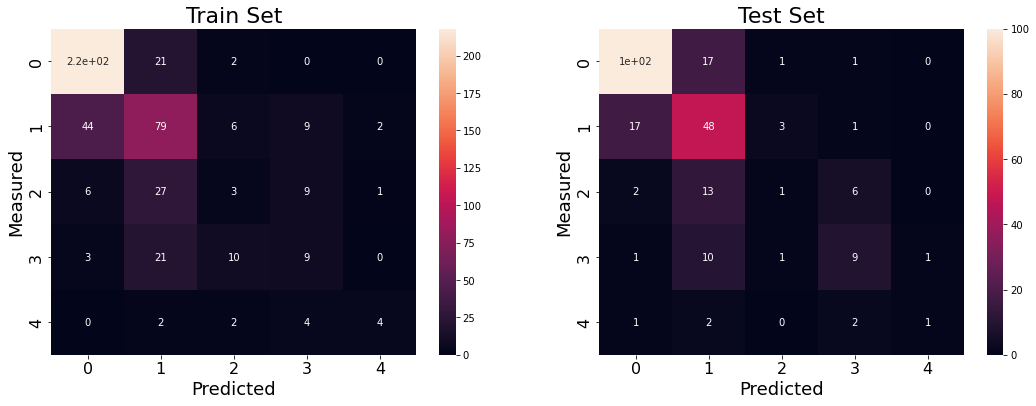

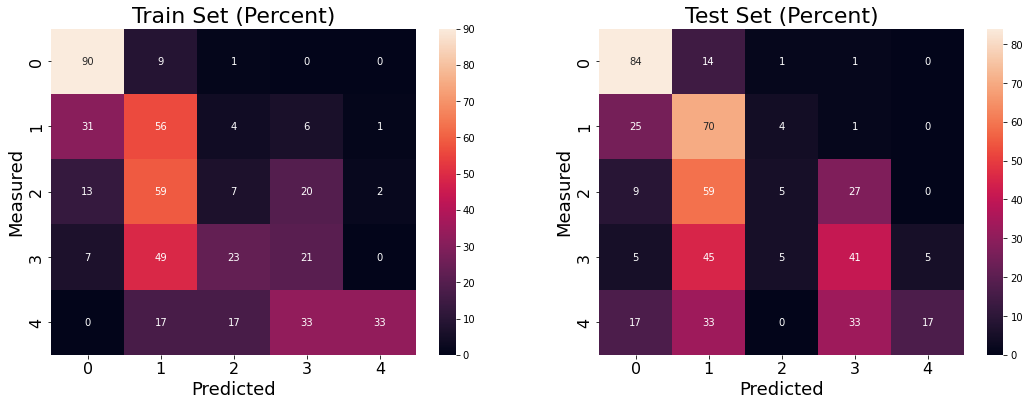

In [14]:
glm = LogisticRegression()
glm.set_params(max_iter = 10000)
model_fit2(glm, X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA)
plot_confusion_matrix(glm, X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA)

In [15]:
glm = LogisticRegression()
glm.set_params(max_iter = 10000)
model_fit2(glm, X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA)

LogisticRegression

Train score is :0.647
Test score is :0.672


In [16]:
glm = LogisticRegression()
glm.set_params(max_iter = 10000)
model_fit2(glm, X_train_F, X_test_F, Y_train_F, Y_test_F)

LogisticRegression

Train score is :0.674
Test score is :0.634


In [17]:
c_param = [10.0**i for i in np.arange(-5,5,1)]
class_weight = ['auto','balanced']
penalty = ['l1', 'l2','none']
solver = ["newton-cg", "sag", "saga", "lbfgs"]
warm_start = True

In [18]:
#glm = LogisticRegression()
#glm.set_params(warm_start = True, max_iter = 1e4)
#grid_param = {'C':c_param, 'class_weight' : class_weight, 'penalty':penalty, 'solver':solver}
#glm_cv = GridSearchCV(glm, grid_param, cv = 3, return_train_score = True)
#%time glm_cv.fit(X_train, Y_train)

In [20]:
#glm_df = pd.DataFrame(data = glm_cv.cv_results_)
#glm_df.dropna(axis=0, how = 'any', inplace=True)
#glm_final_df = glm_df.loc[:,['param_C','param_class_weight','param_penalty','param_solver','mean_train_score',
                            #'mean_test_score']]
#glm_df.to_csv('LogisticRegression.csv')

In [21]:
glm = LogisticRegression()
glm.set_params(max_iter = 10000)
model_fit2(glm, X_train, X_test, Y_train, Y_test)

LogisticRegression

Train score is :0.647
Test score is :0.672


LogisticRegression


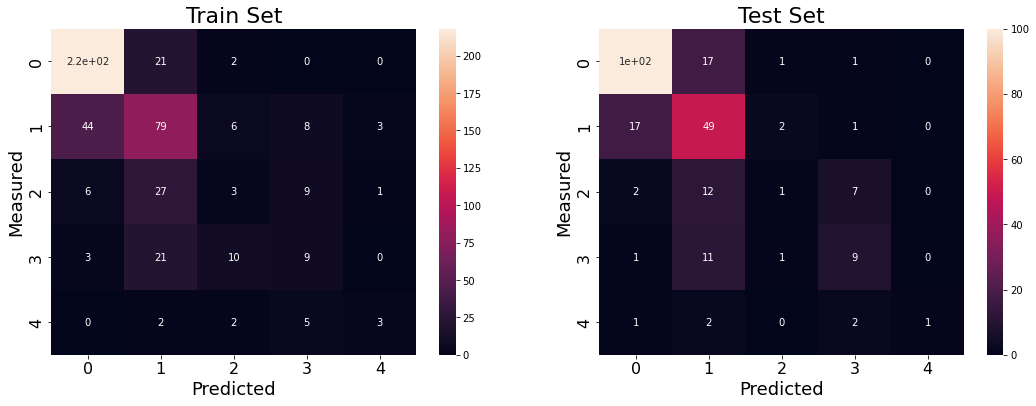

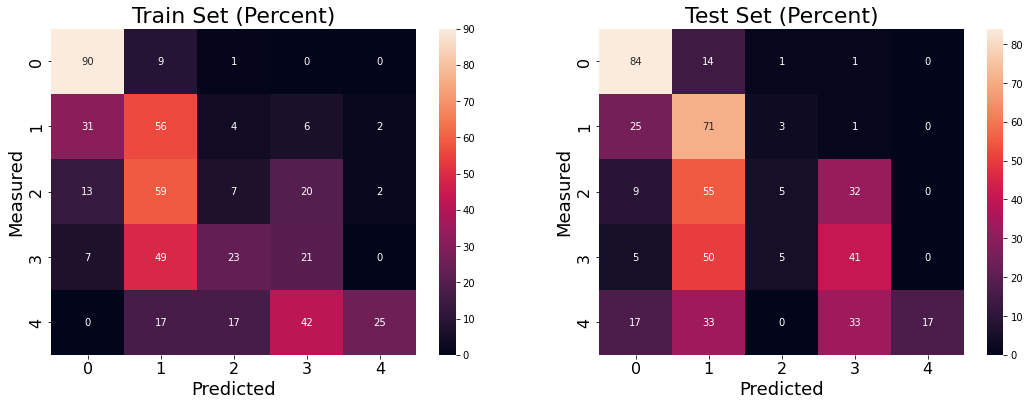

In [22]:
plot_confusion_matrix(glm, X_train, X_test, Y_train, Y_test)

Precision score for training set is :0.8
Precision score for testing  set is :0.83
Recall score for training set is :0.9
Recall score for testing  set is :0.84
F1 score for training set is :0.85
F1 score for testing  set is :0.83
AUC for training set is :0.89
AUC for testing  set is :0.88


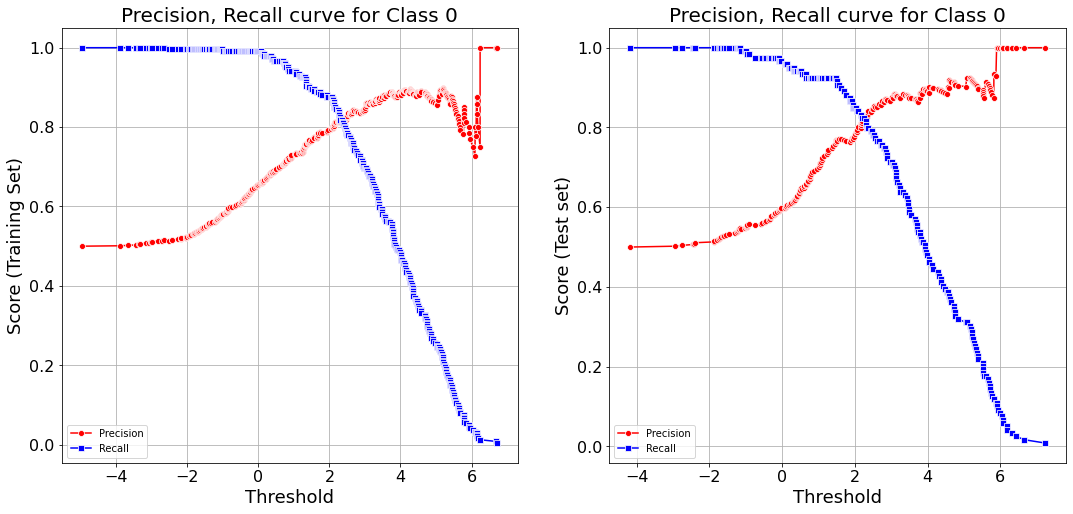

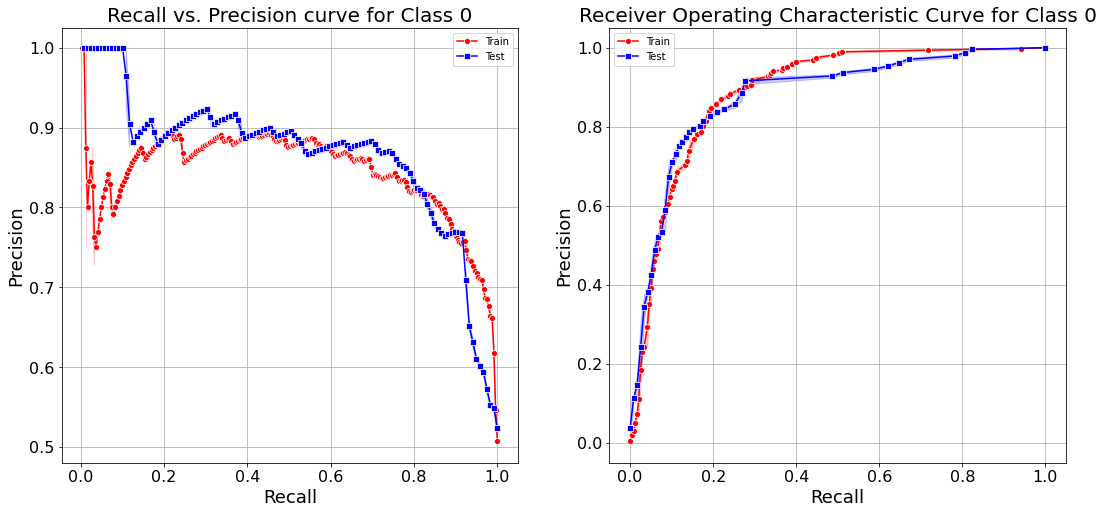

In [23]:
get_precision_recall(glm, X_train, X_test, Y_train, Y_test, 0)

Precision score for training set is :0.43
Precision score for testing  set is :1.0
Recall score for training set is :0.25
Recall score for testing  set is :0.17
F1 score for training set is :0.32
F1 score for testing  set is :0.29
AUC for training set is :0.85
AUC for testing  set is :0.69


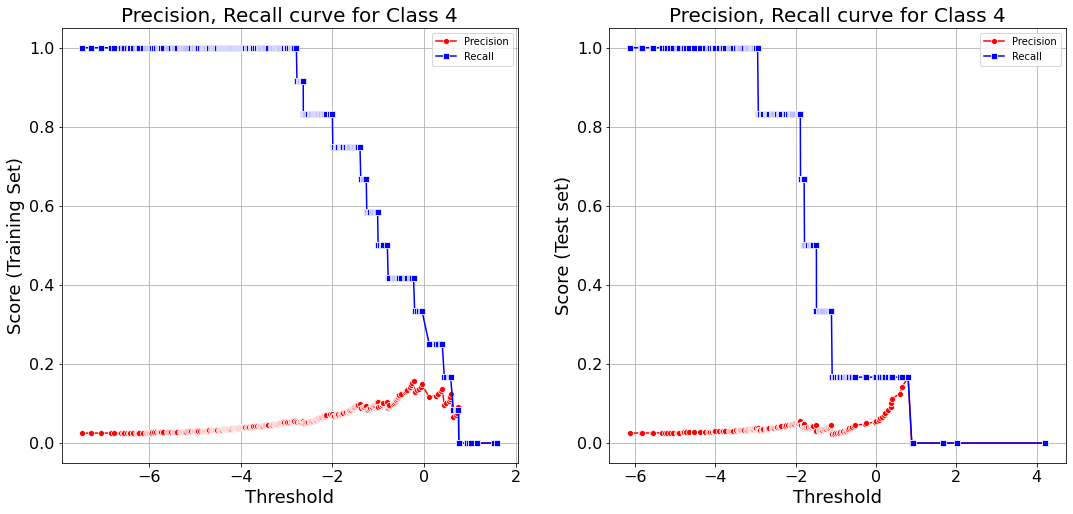

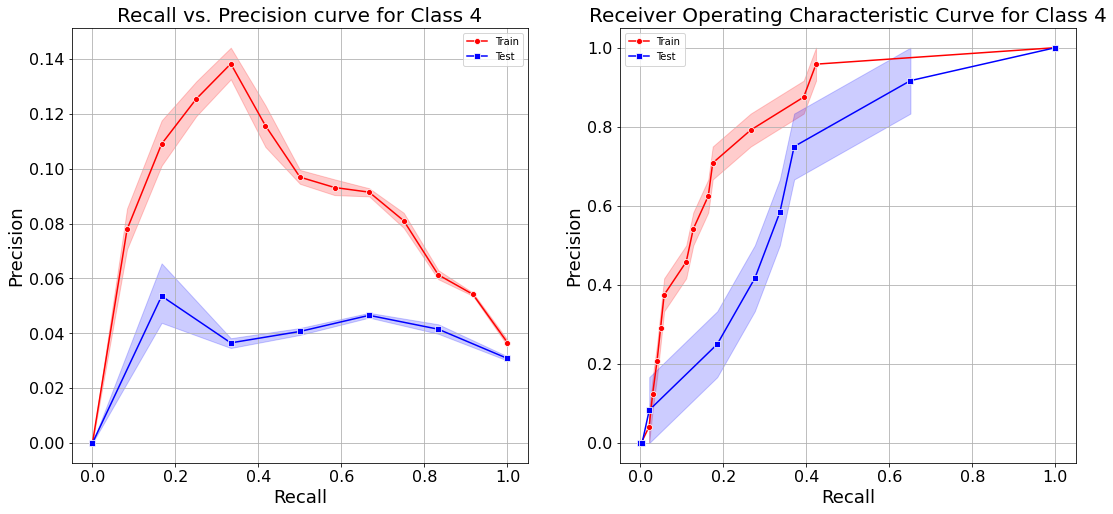

In [24]:
get_precision_recall(glm, X_train, X_test, Y_train, Y_test, 4)

In [25]:
X_train.shape

(482, 13)